# Basic Conceps in NetworkX

## References 
- [lecture note](https://docs.google.com/document/d/1mT5inDeGxMzQNIfJermPCPAlpfPgCjmH20O5RR53PCs/edit)
- [lecture code](https://github.com/memgraph/graph-analytics-course/tree/master/lecture-1)

## Module import

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## 1a. Creating a node with attributes 

['1']
{'1': 'Person'}


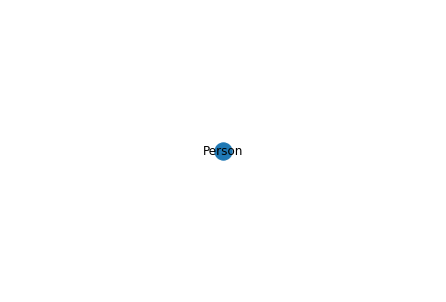

In [2]:
G = nx.Graph() # graph object 

# node named '1' with attrtibutes
G.add_node('1', label='Person', name='John Doe', age=40)

print(G.nodes) # return list of existing nodes

pos = nx.spring_layout(G) # position the graph

nx.draw(G, pos) 

# return dictionary - key=node & value=name of atts
node_labels = nx.get_node_attributes(G, 'label') 
print(node_labels)
nx.draw_networkx_labels(G, pos, labels=node_labels)

plt.show()

## 1b. Creating nodes with atttributes

['1', '2']
{'1': 'Person', '2': 'Person'}


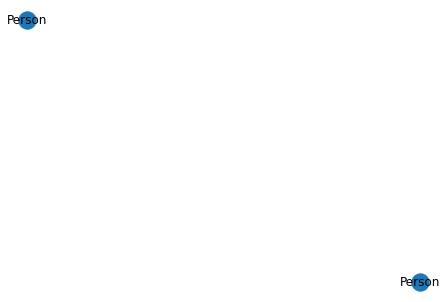

In [3]:
G = nx.Graph()

# add multiple nodes
G.add_nodes_from([('1', {'label': 'Person', 'name': 'John Doe', 'age': 40}),
                  ('2', {'label': 'Person', 'name': 'Anna Doe', 'age': 35})])

print(G.nodes)

pos = nx.spring_layout(G)

nx.draw(G, pos)

node_labels = nx.get_node_attributes(G, 'label')
print(node_labels)
nx.draw_networkx_labels(G, pos, labels=node_labels)

plt.show()

In [4]:
G.nodes['1']['name']

'John Doe'

## 2a. Creating edge with attributes

[('1', '2')]
{('1', '2'): 'CONNECTED_TO'}


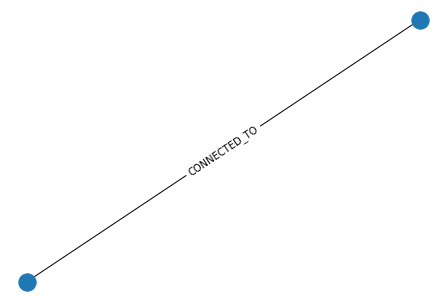

In [5]:
G = nx.Graph()

# connect edge from node '1' to '2' with 'type' atttribute 
G.add_edge('1', '2', type='CONNECTED_TO')

print(G.edges)

pos = nx.spring_layout(G)

nx.draw(G, pos)

edge_labels = nx.get_edge_attributes(G, 'type')
print(edge_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

## 2b. Creating edges with attributes

[('1', '2'), ('1', '3'), ('2', '3')]
{('1', '2'): 'CONNECTED_TO', ('1', '3'): 'CONNECTED_TO', ('2', '3'): 'CONNECTED_TO'}


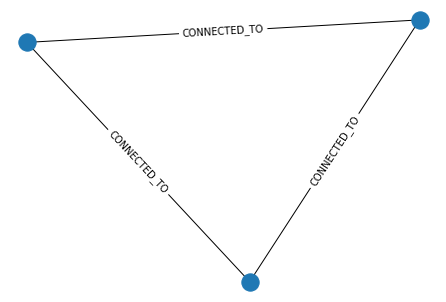

In [6]:
G = nx.Graph()
G.add_edges_from([('1', '2'), ('2', '3'), ('3', '1')],
                 type='CONNECTED_TO')

print(G.edges)

pos = nx.spring_layout(G)

nx.draw(G, pos)

edge_labels = nx.get_edge_attributes(G, 'type')
print(edge_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

In [7]:
G.edges[('1', '2')]['type']

'CONNECTED_TO'

## 3. Graph types

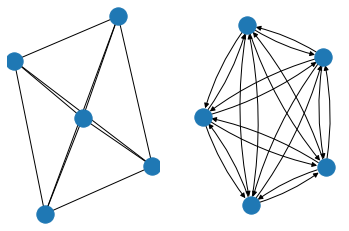

In [8]:
G = nx.complete_graph(5, nx.Graph())

plt.subplot(121) # 1st row, 1st column, 1st index(count from 1)
nx.draw(G) # need no position because position by plt.subplot()

G = nx.complete_graph(5, nx.MultiDiGraph())

plt.subplot(122) # 1st row, 2nd column, 2nd index(count from 1)
nx.draw(G, connectionstyle='arc3, rad = 0.1')

plt.show()

## 4. Edge direction

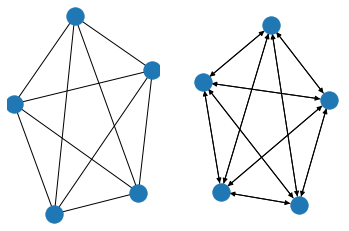

In [9]:
G = nx.complete_graph(5, nx.Graph())

plt.subplot(121)
nx.draw(G)

G = G.to_directed() #directed

plt.subplot(122)
nx.draw(G)

plt.show()

## 5a. Example: Creating bank database schema
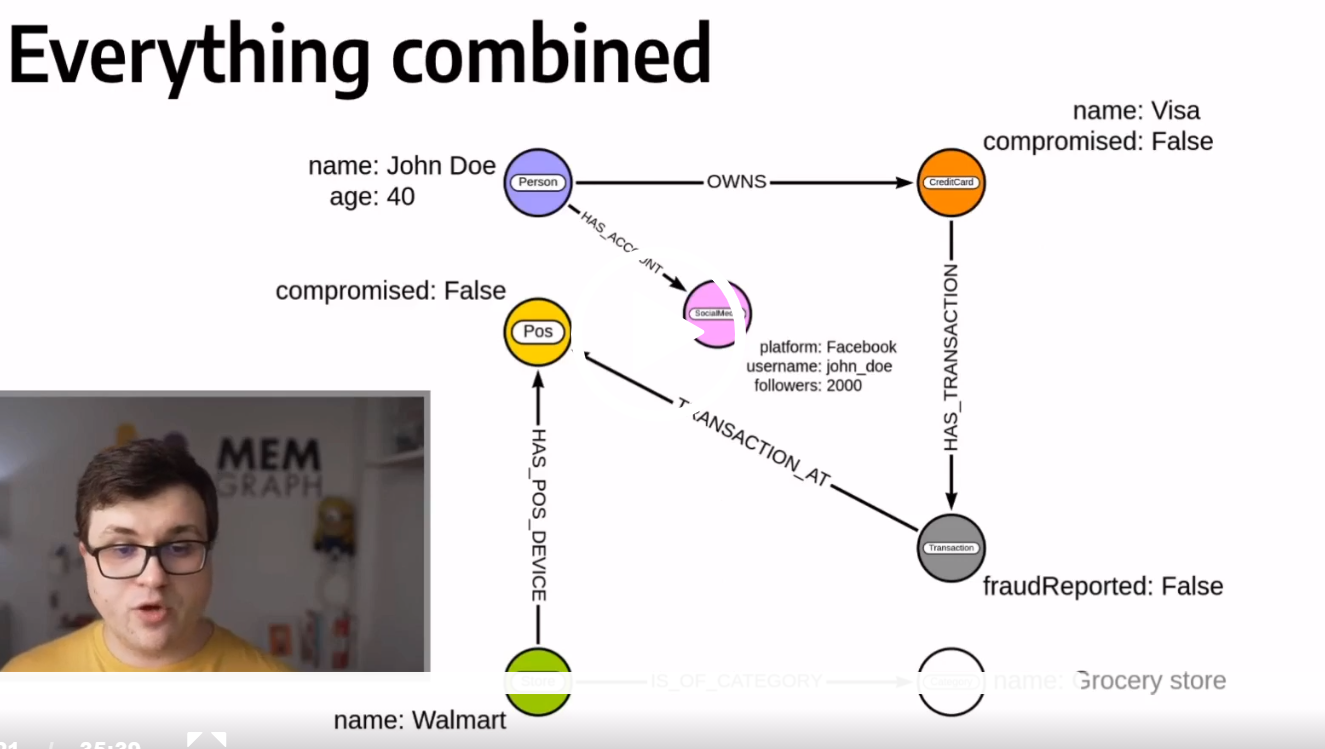

['1', '2', '22', '3', '4', '5', '6']
[('1', '2'), ('1', '22'), ('2', '6'), ('3', '4'), ('3', '5'), ('6', '5')]


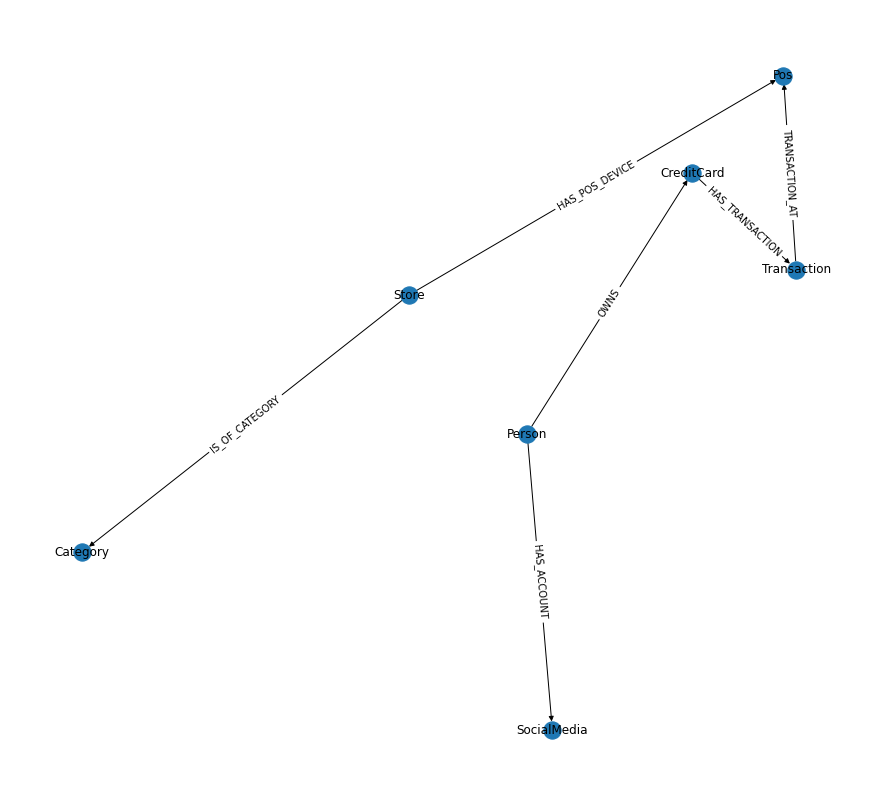

In [10]:
plt.figure(figsize=(12,11))
G = nx.DiGraph()

# 1. customer / person intergrah model - credit card & social media
G.add_nodes_from([('1', {'label': 'Person', 'name': 'John Doe', 'age': 40}),
                 ('2', {'label': 'CreditCard', 'name': 'Visa', 'compromised': False}),
                 ('22', {'label': 'SocialMedia', 'username:': 'Facebook', 'platform': 'Facebook', 'followers': 2000 })])

G.add_edges_from([('1', '2')], type='OWNS')
G.add_edges_from([('1', '22')], type='HAS_ACCOUNT')

# 2. store intergraph model - POS (point of sale)device & category
G.add_node('3', label='Store', name='Walmart')
G.add_node('4', label='Category', name='Grocery store')
G.add_node('5', label='Pos', compromised=False)

G.add_edges_from([('3', '4')], type='IS_OF_CATEGORY')
G.add_edges_from([('3', '5')], type='HAS_POS_DEVICE')

# 3. transaction intergraph model
G.add_node('6', label='Transaction', fraudReported=False)

G.add_edges_from([('2', '6')], type='HAS_TRANSACTION') #cerdit card has transaction
G.add_edges_from([('6', '5')], type='TRANSACTION_AT') #transaction at POS device

print(G.nodes)
print(G.edges)

pos = nx.spring_layout(G)
nx.draw(G, pos) #draw the graph at position

node_labels = nx.get_node_attributes(G,'label')
nx.draw_networkx_labels(G, pos, labels = node_labels) # draw nodes labels

edge_labels = nx.get_edge_attributes(G,'type')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels) # draw edges labels

plt.show()

## 5b. Example: Complete bank dadtase (more data points / nodes)
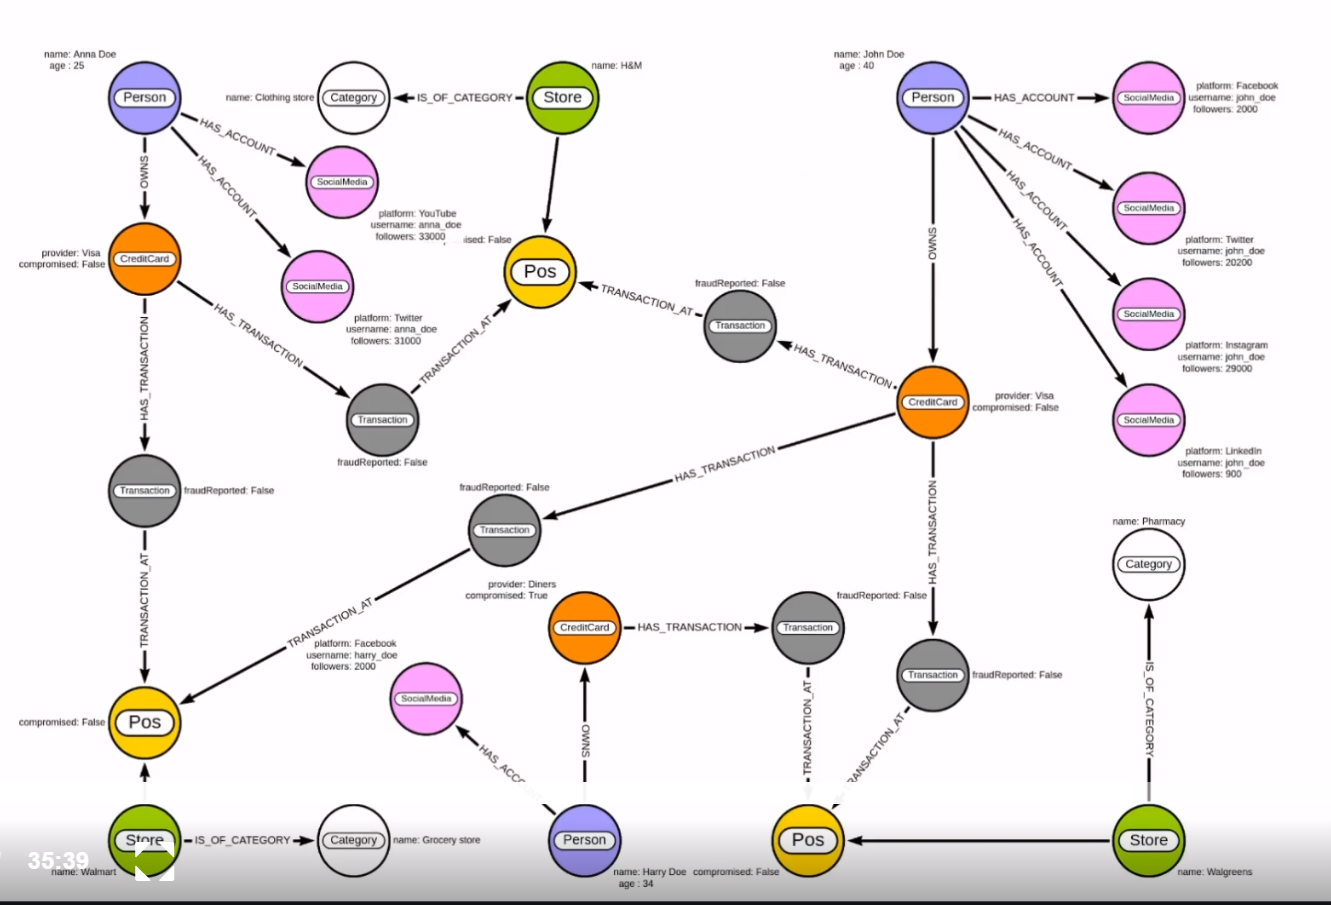

['1', '2', '3', '4', '5', '6', '22', '23', '24', '25', '26', '27', '28', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21']
[('1', '4'), ('1', '22'), ('1', '23'), ('1', '24'), ('1', '25'), ('2', '5'), ('2', '26'), ('2', '27'), ('3', '6'), ('3', '28'), ('4', '16'), ('4', '17'), ('4', '18'), ('5', '19'), ('5', '20'), ('6', '21'), ('7', '10'), ('7', '13'), ('8', '11'), ('8', '14'), ('9', '12'), ('9', '15'), ('16', '13'), ('17', '14'), ('18', '15'), ('19', '13'), ('20', '14'), ('21', '15')]


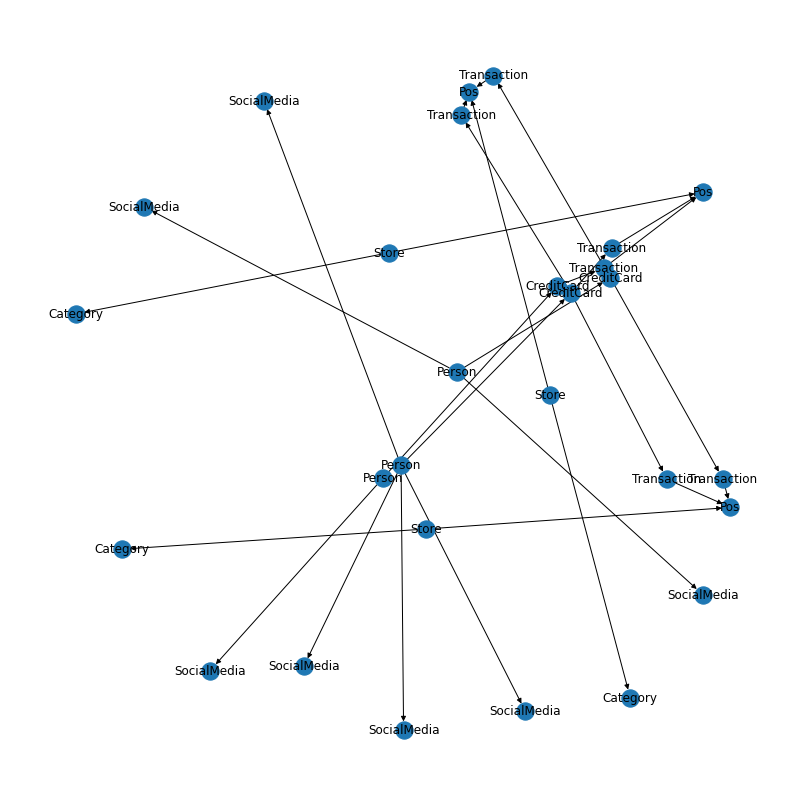

In [11]:
plt.figure(figsize=(11,11))
G = nx.DiGraph()

# 1. Customers' credit card info and social media info
G.add_nodes_from([('1', {'label': 'Person', 'name': 'John Doe', 'age': 40}),
                  ('2', {'label': 'Person', 'name': 'Anna Doe', 'age': 25}),
                  ('3', {'label': 'Person', 'name': 'Harry Doe', 'age': 34})])

G.add_nodes_from([('4', {'label': 'CreditCard', 'provider': 'Visa', 'compromised': False}),
                  ('5', {'label': 'CreditCard', 'provider': 'Maestro', 'compromised': False}),
                  ('6', {'label': 'CreditCard', 'provider': 'Diners', 'compromised': True})])

G.add_node('22', label='SocialMedia', username='john_doe', platform='Facebook', followers=2000)
G.add_node('23', label='SocialMedia', username='john_doe', platform='Twitter', followers=20200)
G.add_node('24', label='SocialMedia', username='john_doe', platform='Instagram', followers=29000)
G.add_node('25', label='SocialMedia', username='john_doe', platform='LinkedIn', followers=900)
G.add_node('26', label='SocialMedia', username='anna_doe', platform='YouTube', followers=33000)
G.add_node('27', label='SocialMedia', username='anna_doe', platform='Twitter', followers=31000)
G.add_node('28', label='SocialMedia', username='harry_doe', platform='Facebook',  followers=2000)

G.add_edges_from([('1', '4'), ('2', '5'), ('3', '6')], type='OWNS')
G.add_edges_from([('1', '22'), ('1', '23'), ('1', '24'), ('1', '25'),
                  ('2', '26'), ('2', '27'), ('3', '28')], type='HAS_ACCOUNT')

# 2. Store's caterogy and POS device
G.add_node('7', label='Store', name='Walmart')
G.add_node('8', label='Store', name='Walgreens')
G.add_node('9', label='Store', name='H&M')

G.add_node('10', label='Category', name='Grocery store')
G.add_node('11', label='Category', name='Pharmacy')
G.add_node('12', label='Category', name='Clothing store')

G.add_node('13', label='Pos', compromised=False)
G.add_node('14', label='Pos', compromised=False)
G.add_node('15', label='Pos', compromised=False)

G.add_edges_from([('7', '10'), ('8', '11'), ('9', '12')], type='IS_PART_OF_CATEGORY')
G.add_edges_from([('7', '13'), ('8', '14'), ('9', '15')], type='HAS_POS_DEVICE')

# 3. Transactions' soaurce and target
G.add_node('16', label='Transaction', fraudReported=False)
G.add_node('17', label='Transaction', fraudReported=False)
G.add_node('18', label='Transaction', fraudReported=False)
G.add_node('19', label='Transaction', fraudReported=False)
G.add_node('20', label='Transaction', fraudReported=False)
G.add_node('21', label='Transaction', fraudReported=False)

G.add_edges_from([('4', '16'), ('4', '17'), ('4', '18'),
                  ('5', '19'), ('5', '20'), ('6', '21')], type='HAS_TRANSACTION')

G.add_edges_from([('16', '13'), ('17', '14'), ('18', '15'),
                  ('19', '13'), ('20', '14'), ('21', '15')], type='TRANSACTION_AT')

print(G.nodes)
print(G.edges)

pos = nx.spring_layout(G)
nx.draw(G, pos)

node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=node_labels)

plt.show()